# Arquitetura rede Deep Learning genérica para classificação binária de texto.

### Passos para Construir o Modelo

1. **Pré-processamento dos Dados**: Transformar o texto em uma representação numérica que o modelo possa entender.
2. **Definir a Arquitetura da Rede Neural**: Criar as camadas da rede neural.
3. **Compilar o Modelo**: Definir a função de perda, o otimizador e as métricas.
4. **Treinar o Modelo**: Ajustar os pesos do modelo com os dados de treinamento.
5. **Avaliar o Modelo**: Verificar o desempenho do modelo com os dados de teste.

### 1. Pré-processamento dos Dados

O Keras oferece vários datasets nativos que são úteis para testar e prototipar modelos de aprendizado de máquina.

Aqui estão alguns dos principais datasets disponíveis no módulo `keras.datasets`:

1. **MNIST**: Digitos manuscritos para classificação.
2. **CIFAR-10**: Pequenas imagens para classificação.
3. **CIFAR-100**: Pequenas imagens para classificação com mais classes.
4. **IMDB**: Avaliações de filmes para análise de sentimentos.
5. **Reuters**: Notícias para classificação de tópicos.
6. **Fashion MNIST**: Alternativa ao MNIST com imagens de roupas.
7. **California Housing**: Preços de casas para regressão.

Para ler esses datasets em Python, você pode usar o seguinte código como exemplo:

```python
import numpy as np
from tensorflow.keras.datasets import mnist, cifar10, cifar100, imdb, reuters, fashion_mnist

# MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# CIFAR-100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# IMDB
(x_train, y_train), (x_test, y_test) = imdb.load_data()

# Reuters
(x_train, y_train), (x_test, y_test) = reuters.load_data()

# Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
```

As bibliotecas que você precisa importar são:

- `numpy` para manipulação de arrays.
- `tensorflow.keras.datasets` para carregar os datasets.



### [documentação oficial do Keras](https://keras.io/api/datasets/)  
  
    
## Vamos usar o dataset **`IMDB`** para simplificar.

* A base de dados IMDB (Internet Movie Database) é um conjunto de dados amplamente utilizado no campo do processamento de linguagem natural (PLN), especialmente para tarefas de classificação de sentimentos.

* Ela é composta por **milhões de reviews de filmes**, cada um rotulado como *positivo ou negativo*.

### Usos da Base de Dados IMDB

* **Classificação de Sentimentos:** O uso mais comum da IMDB é para treinar modelos que possam determinar se um texto expressa uma opinião positiva ou negativa. Isso tem aplicações em diversas áreas, como análise de redes sociais, atendimento ao cliente e recomendação de produtos.

* **Análise de Sentimentos em Diferentes Domínios:** Ao pré-processar a IMDB, é possível adaptá-la para analisar sentimentos em outros domínios, como reviews de produtos, artigos de notícias ou até mesmo posts em fóruns.

* **Geração de Texto:** A IMDB pode ser utilizada para gerar texto com características semelhantes aos reviews, como parte de modelos de geração de texto.

* **Extração de Características:** É possível extrair características linguísticas dos reviews da IMDB, como palavras-chave, n-gramas e emoticons, para análise mais aprofundada.

### Características da Base de Dados IMDB

* **Grande Volume de Dados:** A IMDB contém milhões de reviews, o que permite treinar modelos robustos e generalizáveis.


* **Rotulagem Binária:** Cada review é rotulado como positivo ou negativo, simplificando a tarefa de classificação.


* **Desbalanceamento de Classes:** Em alguns casos, pode haver um desbalanceamento entre as classes positivas e negativas, o que pode exigir técnicas de balanceamento de dados.


* **Ruído e Variabilidade:** Os reviews da IMDB apresentam uma grande variedade de estilos de escrita, gramática e vocabulário, o que torna a tarefa de classificação mais desafiadora.



### Campos da Base de Dados IMDB

A estrutura exata da base de dados IMDB pode variar dependendo da fonte e do pré-processamento realizado. No entanto, os campos mais comuns incluem:

* **Review:** O texto completo do review.

* **Sentimento:** A etiqueta correspondente ao sentimento expresso no review (positivo ou negativo).

* **ID do Review:** Um identificador único para cada review.

* **Informações Adicionais:** Em algumas versões, podem estar presentes informações adicionais, como a data do review, o nome do filme ou o usuário que escreveu o review.

### Pré-processamento da IMDB

Antes de utilizar a IMDB para treinar um modelo, é comum realizar algumas etapas de pré-processamento:

* **Limpeza de Texto:** Remoção de caracteres especiais, números, stop words e normalização de texto.

* **Tokenização:** Divisão do texto em palavras ou tokens.

* **Vetorização:** Representação das palavras em um formato numérico que pode ser processado por algoritmos de aprendizado de máquina.

* **Balanceamento de Classes:** Caso haja desbalanceamento entre as classes, técnicas como oversampling ou undersampling podem ser aplicadas.


## Importando as bibliotecas iniciais


```python
from tensorflow.keras.datasets import imdb

# explicação mais adiante sobre padf_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences


# variaveis que devem se definidas
# foi determinado a priori porque já se conhece essa base de dados
# caso seja uma base de dados nova deve-se calcular
# mais adiante na disciplina vamos entender

max_features = 10000  # Número máximo de palavras a considerar
maxlen = 100  # Tamanho máximo das sequências
```

- **`max_features`**: Limita o vocabulário às palavras mais frequentes, reduzindo a dimensionalidade e focando nas palavras mais relevantes.
- **`maxlen`**: Padroniza o comprimento das sequências de texto, garantindo uniformidade e controlando a complexidade do modelo.

### **max_features = 10000**

**Número máximo de palavras a considerar**

1. **Definição**:
   - `max_features` define o tamanho do vocabulário que será considerado pelo modelo. Neste caso, estamos limitando o vocabulário às 10.000 palavras mais frequentes no conjunto de dados.

2. **Importância da definição do vocabulário**:
   - **Redução da Dimensionalidade**: Limitar o vocabulário ajuda a reduzir a dimensionalidade dos dados, tornando o treinamento do modelo mais eficiente e rápido.
   - **Memória e Computação**: Trabalhar com um vocabulário menor reduz a quantidade de memória necessária e o tempo de computação.

3. **Exemplo**:
   - Se o conjunto de dados contiver *50.000 palavras únicas* esse será o nosso vocabulário, mas `max_features` for definido como 10.000, apenas as 10.000 palavras mais frequentes serão consideradas. As demais palavras serão ignoradas ou tratadas como desconhecidas.

### **maxlen = 100**

**Tamanho máximo das sequências**

1. **Definição**:
   - `maxlen` define o comprimento máximo das sequências de texto que serão alimentadas no modelo. Neste caso, cada sequência de texto será truncada ou preenchida (padded) para ter exatamente 100 palavras.

2. **Importância**:
   - **Uniformidade**: Garantir que todas as sequências tenham o mesmo comprimento é crucial para o processamento em lote (batch processing) nas redes neurais.
   - **Controle de Complexidade**: Limitar o comprimento das sequências ajuda a controlar a complexidade do modelo e a evitar que ele se torne excessivamente grande e difícil de treinar.
   - **Foco nas Partes Relevantes**: Em muitos casos, as partes mais importantes do texto estão nas primeiras palavras. Truncar sequências longas pode ajudar a focar nas partes mais relevantes.

3. **Exemplo**:
   - Se uma sequência de texto tiver 150 palavras, ela será truncada para 100 palavras. Se tiver 80 palavras, será preenchida com zeros (ou outro valor de padding) até atingir 100 palavras.

* codigo com uso de *max_features*
_________________________________________________________________
```python
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)
```

### O Que é `pad_sequences`

* A função `pad_sequences` é uma ferramenta útil no pré-processamento de dados de texto para redes neurais, especialmente em tarefas de processamento de linguagem natural (NLP).
* A função `pad_sequences` do Keras é usada para garantir que todas as sequências em um conjunto de dados tenham o mesmo comprimento.
* Isso é necessário porque muitos algoritmos de aprendizado de máquina, incluindo redes neurais, exigem que as entradas tenham um tamanho fixo.

### Por Que Usar `pad_sequences`

1. **Uniformidade**: As redes neurais processam dados em lotes (batches). Para que isso seja eficiente, todas as sequências em um lote precisam ter o mesmo comprimento.
2. **Eficiência Computacional**: Trabalhar com sequências de comprimento fixo simplifica a implementação e melhora a eficiência computacional.
3. **Facilidade de Implementação**: Simplifica o código, pois não é necessário lidar com sequências de diferentes comprimentos manualmente.

### Como Funciona `pad_sequences`

A função `pad_sequences` ajusta o comprimento das sequências de duas maneiras principais:

1. **Padding**: Adiciona valores (geralmente zeros) ao final ou início das sequências mais curtas para que todas tenham o mesmo comprimento.
2. **Truncamento**: Corta as sequências mais longas para que todas tenham o mesmo comprimento.

### Parâmetros Principais

- **`sequences`**: Lista de sequências (listas de inteiros) a serem padronizadas.
- **`maxlen`**: Comprimento máximo das sequências. Se não for especificado, todas as sequências serão padronizadas para o comprimento da sequência mais longa.
- **`dtype`**: Tipo de dados dos elementos das sequências resultantes (por exemplo, `int32`).
- **`padding`**: Onde adicionar os valores de padding (`'pre'` para início, `'post'` para final).
- **`truncating`**: Onde truncar as sequências (`'pre'` para início, `'post'` para final).
- **`value`**: Valor usado para padding (padrão é 0).

### Exemplo de Uso

```python
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Exemplo de sequências de diferentes comprimentos
# a primeira linha tem 3 colunas
# segunda linha tem 5 colunas
# terceira linha tem 2 colunas

sequences = [
    [1, 2, 3],
    [4, 5, 6, 7, 8],
    [9, 10]
]
```

**Exemplo de uso**

```python
# Padronizar as sequências para um comprimento máximo de 5
# as sequencias que foram maiores que 5 serão truncadas em 5

padded_sequences = pad_sequences(sequences, maxlen=5, padding='post', truncating='post')

print(padded_sequences)

# Saída do Exemplo

[[ 1  2  3  0  0]
 [ 4  5  6  7  8]
 [ 9 10  0  0  0]]
```

### Explicação do Exemplo

1. **Sequências Originais**: Temos três sequências de comprimentos diferentes.
2. **`maxlen=5`**: Todas as sequências serão ajustadas para um comprimento de 5.
3. **`padding='post'`**: O padding (zeros) será adicionado ao final das sequências mais curtas.
4. **`truncating='post'`**: As sequências mais longas serão truncadas ao final.



```python
# Padronizar o comprimento das sequências
# como já sabemos o valor do max_len não foi preciso calcular

train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)
```

### 2. Definir a Arquitetura da Rede Neural

Uma rede neural simples, ou **shallow net**, é caracterizada por ter uma arquitetura relativamente simples, geralmente composta por três tipos principais de camadas:

1. **Camada de Entrada (Input Layer)**:
   - **Função**: Recebe os dados brutos que serão processados pela rede.
   - **Exemplo**: Em uma rede que processa imagens, a camada de entrada pode receber os pixels da imagem.

2. **Camada Oculta (Hidden Layer)**:
   - **Função**: Realiza a maior parte do processamento e extração de características dos dados.
   - **Detalhes**: Em uma shallow net, geralmente há apenas uma camada oculta. Cada neurônio nesta camada aplica uma função de ativação aos dados recebidos da camada de entrada.
   - **Funções de Ativação Comuns**: ReLU (Rectified Linear Unit), Sigmoid, Tanh, etc.

3. **Camada de Saída (Output Layer)**:
   - **Função**: Produz a saída final ou a previsão da rede.
   - **Exemplo**: Em um problema de classificação, a camada de saída pode ter um neurônio para cada classe possível e usar uma função de ativação como softmax para gerar probabilidades.

Exemplo de como uma shallow net pode ser implementada em Keras:

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Definindo o modelo
model = Sequential()

# Camada de entrada e oculta
model.add(Input(shape=(100,)))

# Camada oculta
model.add(Dense(units=64, activation='relu'))

# Camada de saída
model.add(Dense(units=num_classes, activation='softmax'))

```

- **1. Camada de Entrada**:
`input_shape=(input_dim,)`
  - define a forma dos dados de entrada.

- **2. Camada Oculta**:
`(Dense(units=64, activation='relu'))`
  - `units=64` define 64 neurônios na camada oculta.
  - `activation='relu'` aplica a função de ativação ReLU, e
  

* A escolha de 64 neurônios na camada oculta foi apenas um exemplo.

* Não existe um número “ideal” de neurônios que funcione para todos os problemas, pois isso depende de vários fatores, incluindo a complexidade dos dados e a tarefa específica que você está tentando resolver.

  **Complexidade dos Dados:**
    Dados mais complexos podem exigir mais neurônios para capturar padrões e características relevantes.

  **Overfitting e Underfitting:**

   * *Overfitting: Usar muitos neurônios pode levar a um modelo que se ajusta muito bem aos dados de treinamento, mas não generaliza bem para novos dados.*

   * *Underfitting: Usar poucos neurônios pode resultar em um modelo que não captura suficientemente os padrões nos dados.*

  **Experimentação e Validação Cruzada:**

  * Muitas vezes, a melhor abordagem é experimentar com diferentes números de neurônios e usar validação cruzada para avaliar o desempenho do modelo.

  **Recomendações Práticas:**

  * Comece com um número moderado de neurônios (por exemplo, 32, 64, 128) e ajuste conforme necessário.
  Use técnicas como regularização (dropout, L2 regularization) para evitar overfitting.  

  **Heurísticas e Intuição**:

  - Método: Basear-se na experiência e intuição.
  
  - Como Fazer:
  Começar com um número moderado de neurônios e ajustar com base nos resultados.

  - Usar conhecimento prévio de problemas semelhantes.
   
   
* 3.**Camada de Saída**:

  `Dense(units=num_classes, activation='softmax')`
  - `units=num_classes` define o número de neurônios na camada de saída, que corresponde ao número de classes no problema de classificação, e `activation='softmax'` aplica a função de ativação softmax para gerar probabilidades.


### Observação:

Essa estrutura simples é suficiente para muitos problemas básicos de classificação e regressão, mas para problemas mais complexos, redes neurais mais profundas (deep nets) são geralmente necessárias.

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# lembrando que definimos os valores
# max_len = 100
#max_features = 10000

# Definir o modelo
model = Sequential()
model.add(Input(shape=(maxlen,)))
model.add(Embedding(input_dim=max_features, output_dim=32))
model.add(Flatten())
model.add(Dense(16, activation='relu'))  
model.add(Dense(1, activation='sigmoid'))
```

## Explicação das Camadas

**Definição do Modelo**:
   ```python
   model = Sequential()
   ```
   - **Função**: Cria um modelo sequencial, que é uma pilha linear de camadas.

**Camada de Entrada**:
   ```python
   model.add(Input(shape=(maxlen,)))
   ```
   - **Função**: Define a forma da entrada do modelo. Aqui, `maxlen = 100`, então a entrada será uma sequência de 100 inteiros.

**Camada de Embedding**:
   ```python
   model.add(Embedding(input_dim=max_features, output_dim=32))
   ```
   - **Função**: Transforma os inteiros da entrada em vetores densos de dimensão fixa.
   - **Detalhes**: `input_dim=max_features` define o tamanho do vocabulário (10.000 palavras), e `output_dim=32` define a dimensão dos vetores de embedding.

**Camada de Flatten**:
   ```python
   model.add(Flatten())
   ```
   - **Função**: Achata a saída da camada de embedding de uma matriz 2D para um vetor 1D.
   - **Detalhes**: Se a saída da camada de embedding é `(100, 32)`, após o flattening, será `(100 * 32,)`, ou seja, `(3200,)`.
- **Função**: Achata a saída da camada de embedding para que possa ser alimentada em uma camada densa.
   - A camada Flatten é essencial em redes neurais, especialmente quando se trabalha com dados que têm uma estrutura multidimensional, como imagens ou sequências de texto após a camada de embedding.
   - A camada Flatten transforma uma matriz multidimensional em um vetor unidimensional. Isso é necessário porque as camadas densas (fully connected) esperam entradas unidimensionais.
   - **Por Que Usar a Camada Flatten** : Transição de Dimensões:
   - *Imagens*: Após passar por camadas convolucionais, os dados de imagem ainda estão em formato de matriz (altura, largura, canais). A camada Flatten converte essa matriz em um vetor para que possa ser alimentada em camadas densas.
   - *Embedding de Texto*: Similarmente, após a camada de embedding, os dados de texto estão em formato de matriz (sequência, dimensão do embedding). A camada Flatten transforma isso em um vetor.
   - *Compatibilidade com Camadas Densas*:As camadas densas requerem entradas unidimensionais. A camada Flatten garante que a saída das camadas anteriores esteja no formato correto.


**Camada Oculta**:
   ```python
   model.add(Dense(16, activation='relu'))
   ```
   - **Função**: Adiciona uma camada totalmente conectada (densa) com 16 neurônios.
   - **Detalhes**: `activation='relu'` aplica a função de ativação ReLU, que ajuda a introduzir não-linearidade no modelo.

 - **Função**: Realiza a maior parte do processamento e extração de características.
   - **Parâmetros**: `16` neurônios com função de ativação `relu`.

* A camada densa é uma das camadas mais fundamentais em redes neurais.
* Ela realiza a maior parte do processamento e extração de características dos dados de entrada.
* Cada neurônio em uma camada densa está conectado a todos os neurônios da camada anterior, daí o nome “fully connected” ou “densely connected”.
* **Definição** : O número de neurônios em uma camada densa define quantas unidades de processamento independentes existem nessa camada.
* **Importância**:
    - Capacidade de Aprendizado: Mais neurônios podem capturar mais características dos dados, aumentando a capacidade do modelo de aprender padrões complexos.
    - Complexidade do Modelo: Um número maior de neurônios aumenta a complexidade do modelo, o que pode melhorar o desempenho, mas também pode levar ao overfitting se não for bem regulado.
    - Escolha do Valor: O valor 16 é um exemplo. O número ideal de neurônios depende da complexidade dos dados e do problema específico. Em muitos casos, experimentação e validação cruzada são usadas para encontrar o número ótimo.


**Camada de Saída**:
   ```python
   model.add(Dense(1, activation='sigmoid'))
   ```
   - **Função**: Adiciona uma camada totalmente conectada com 1 neurônio.
   - **Detalhes**: `activation='sigmoid'` é usada para gerar uma saída entre 0 e 1, ideal para problemas de classificação binária.




__________________________________________________________




### 3. Compilar o Modelo

```python
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
```


### Compilação do Modelo
* A compilação do modelo é um passo essencial no processo de construção de uma rede neural. Durante a compilação, você define como o modelo será treinado, especificando o otimizador, a função de perda e as métricas de avaliação.

**Parâmetros utilizados no exemplo**
```python
optimizer='adam', loss='binary_crossentropy' , metrics=['accuracy']
```

**1. optimizer='adam'**

* Definição: O otimizador é o algoritmo que ajusta os pesos da rede neural para minimizar a função de perda.

    - Adam (Adaptive Moment Estimation):
    Combinação de RMSprop e Momentum: Adam combina as vantagens dos otimizadores RMSprop e Momentum, adaptando a taxa de aprendizado para cada parâmetro.
    - Eficiência: É eficiente em termos de memória e computacionalmente, e geralmente funciona bem em uma ampla variedade de problemas.
    - Parâmetros: Adam tem parâmetros como a taxa de aprendizado (learning rate), mas os valores padrão geralmente funcionam bem.

**2. loss='binary_crossentropy'**

* Definição: A função de perda mede a diferença entre as previsões do modelo e os valores reais. É o que o modelo tenta minimizar durante o treinamento.
   - Binary Cross-Entropy:
   - Classificação Binária: binary_crossentropy é usada para problemas de classificação binária, onde as saídas são 0 ou 1.
    - Fórmula: A função de perda calcula a entropia cruzada entre as previsões e os rótulos reais, penalizando previsões incorretas.
    - Importância: Ajuda o modelo a ajustar seus pesos de forma a melhorar a precisão das previsões.

**3. metrics=['accuracy']**

* Definição: As métricas são usadas para avaliar o desempenho do modelo durante o treinamento e a validação.

  * Acurácia:
   - Definição: A acurácia mede a proporção de previsões corretas em relação ao total de previsões.
   -  Importância: É uma métrica simples e intuitiva para avaliar o desempenho de modelos de classificação.
   
  
### Por Que Compilar o Modelo
- Definição do Processo de Treinamento: A compilação define como o modelo será treinado, especificando o otimizador, a função de perda e as métricas.
    - Preparação para o Treinamento: Compilar o modelo prepara-o para o treinamento, configurando os parâmetros necessários para a otimização.
    - Eficiência: A compilação otimiza o código para que o treinamento seja eficiente e rápido.




### 4. Treinar o Modelo

```python
history = model.fit(train_data, train_labels, epochs=10, validation_split=0.2, validation_data=(test_inputs, test_outputs))
```

## Código e Parâmetros

**1. history = model.fit(...)**

* Definição: O método fit treina o modelo usando os dados fornecidos.

* Retorno: Retorna um objeto History que contém os registros de perda e métricas ao longo das épocas de treinamento.

**2. train_data e train_labels**

* train_data: Dados de entrada usados para treinar o modelo.
* train_labels: Rótulos correspondentes aos dados de entrada.

**3. epochs=10**

* Definição: Número de vezes que o algoritmo de treinamento passará por todo o conjunto de dados.

*  Importância:
  - Treinamento Completo: Mais épocas permitem que o modelo aprenda melhor os padrões nos dados.
  - Overfitting: Muitas épocas podem levar ao overfitting, onde o modelo se ajusta demais aos dados de treinamento e não generaliza bem para novos dados.

**4. validation_split=0.2**

* Definição: Fração dos dados de treinamento que será usada como dados de validação.

* Importância:
  - Validação Interna: Permite avaliar o desempenho do modelo em dados não vistos durante o treinamento.
  - Ajuste de Hiperparâmetros: Ajuda a ajustar hiperparâmetros e detectar overfitting.

**5. validation_data=(test_inputs, test_outputs)**

* Definição: Conjunto de dados separado usado para validar o modelo após cada época.

* Importância:
  - Avaliação Externa: Fornece uma avaliação mais robusta do desempenho do modelo em dados completamente separados dos dados de treinamento.
  - Monitoramento: Permite monitorar a performance do modelo em dados de teste durante o treinamento.

### Por Que Treinar o Modelo

* Ajuste dos Pesos: Durante o treinamento, o modelo ajusta seus pesos para minimizar a função de perda, aprendendo a mapear entradas para saídas corretamente.

* Generalização: Treinar o modelo em dados de treinamento permite que ele generalize para novos dados, tornando-o útil para previsões em dados não vistos.
* Avaliação de Desempenho: O treinamento permite avaliar e melhorar o desempenho do modelo, ajustando hiperparâmetros e prevenindo overfitting.


### 5. Avaliar o Modelo

```python
loss, accuracy = model.evaluate(test_data, test_labels)
print(f'Acurácia no conjunto de teste: {accuracy*100:.2f}%')
```

### Exemplo Completo


```python
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# Carregar e pré-processar os dados
max_features = 10000
maxlen = 100

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Definir o modelo
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Avaliar o modelo
loss, accuracy = model.evaluate(test_data, test_labels)
print(f'Acurácia no conjunto de teste: {accuracy*100:.2f}%')
```

### Explicação das Camadas

1. **Camada de Embedding**: Converte palavras em vetores densos.
2. **Camada Flatten**: Achata a saída da camada de embedding.
3. **Camada Densa**: Extrai características com 16 neurônios e ativação ReLU.
4. **Camada de Saída**: Produz a probabilidade de hate speech com ativação Sigmoid.



## Arquitetura genérica de uma Rede Deep Learning para classificação de imagens

Uma rede neural profunda (deep learning) é composta por várias camadas de neurônios, cada uma com uma função específica. Vamos usar um exemplo de classificação de imagens para ilustrar.

#### 1. **Camada de Entrada (Input Layer)**

- **Função**: Recebe os dados de entrada.
- **Exemplo**: Para uma imagem de 28x28 pixels em escala de cinza, a camada de entrada teria 784 neurônios (28 * 28).

```python
from tensorflow.keras.layers import Input
input_layer = Input(shape=(784,))
```

#### 2. **Camadas Ocultas (Hidden Layers)**

- **Função**: Realizam a maior parte do processamento e extração de características.
- **Exemplo**: Vamos adicionar duas camadas densas (fully connected) com funções de ativação ReLU.

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))  # Primeira camada oculta
model.add(Dense(64, activation='relu'))  # Segunda camada oculta
```

#### 3. **Camada de Saída (Output Layer)**

- **Função**: Produz a saída final do modelo.
- **Exemplo**: Para um problema de classificação de dígitos (0-9), a camada de saída teria 10 neurônios com a função de ativação Softmax.

```python
model.add(Dense(10, activation='softmax'))  # Camada de saída
```

### Funções de Ativação

- **ReLU (Rectified Linear Unit)**: Introduz não-linearidade, ajudando a rede a aprender padrões complexos.
- **Softmax**: Converte as saídas em probabilidades, útil para classificação multiclasse.

### Função de Perda e Otimizador

- **Função de Perda**: Mede a diferença entre a previsão do modelo e o valor real. Para classificação multiclasse, usamos `categorical_crossentropy`.
- **Otimizador**: Ajusta os pesos da rede para minimizar a função de perda. Um otimizador comum é o `adam`.

```python
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
```

### Treinamento do Modelo

- **Dados de Treinamento**: Conjunto de dados usado para ajustar os pesos do modelo.
- **Dados de Validação**: Conjunto de dados usado para avaliar o desempenho do modelo durante o treinamento.

```python
history = model.fit(train_inputs, train_outputs, epochs=20, validation_data=(test_inputs, test_outputs))
```

### Resumo do Modelo

```python
model.summary()
```

### Exemplo Completo

Aqui está um exemplo completo de uma rede neural profunda para classificação de dígitos manuscritos (como o dataset MNIST):

```python
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Carregar os dados
(train_inputs, train_outputs), (test_inputs, test_outputs) = mnist.load_data()
train_inputs = train_inputs.reshape((60000, 784)).astype('float32') / 255
test_inputs = test_inputs.reshape((10000, 784)).astype('float32') / 255

# Converter rótulos para one-hot encoding
train_outputs = to_categorical(train_outputs)
test_outputs = to_categorical(test_outputs)

# Definir o modelo
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compilar o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(train_inputs, train_outputs, epochs=20, validation_data=(test_inputs, test_outputs))

# Resumo do modelo
model.summary()
```

### Explicação das Camadas

1. **Camada de Entrada**: Recebe os dados de entrada (imagens achatadas de 28x28 pixels).
2. **Primeira Camada Oculta**: 128 neurônios com ativação ReLU, processa as características das imagens.
3. **Segunda Camada Oculta**: 64 neurônios com ativação ReLU, refina as características extraídas.
4. **Camada de Saída**: 10 neurônios com ativação Softmax, produz as probabilidades para cada uma das 10 classes (dígitos de 0 a 9).


# Exemplo didático com a imdb dataset

* lembrando que estamos lidando aopenas com um parte do dataset por motivos de restrições computacionais

In [12]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Input, LSTM

In [13]:
# Carregar e pré-processar os dados
max_features = 10000  # Número de palavras a serem consideradas
embedding_dim = 16  # Dimensão dos vetores de embedding
max_length = 500    # Comprimento máximo das sequências



In [14]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

In [18]:
# Definir o modelo
model = Sequential()
model.add(Input(shape=(maxlen,)))
model.add(Embedding(max_features, 16))
# Adicione uma camada LSTM
model.add(LSTM(64))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
# Treinar o modelo
history = model.fit(train_data, train_labels, epochs=10, batch_size = 32, validation_split=0.2, validation_data=(test_data, test_labels))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 73ms/step - accuracy: 0.6997 - loss: 0.5395 - val_accuracy: 0.8458 - val_loss: 0.3491
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 79ms/step - accuracy: 0.8926 - loss: 0.2676 - val_accuracy: 0.8486 - val_loss: 0.3542
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 73ms/step - accuracy: 0.9194 - loss: 0.2084 - val_accuracy: 0.8418 - val_loss: 0.3776
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 67ms/step - accuracy: 0.9385 - loss: 0.1657 - val_accuracy: 0.8409 - val_loss: 0.4071
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 70ms/step - accuracy: 0.9555 - loss: 0.1252 - val_accuracy: 0.8341 - val_loss: 0.4635
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 80ms/step - accuracy: 0.9655 - loss: 0.0996 - val_accuracy: 0.8273 - val_loss: 0.5740
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 68ms/step - accuracy: 0.9729 - loss: 0.0797 - val_accuracy: 0.8293 - val_loss: 0.6158
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 67ms/step - accuracy: 0.9786 - loss: 0.0616 - 

In [21]:
# Avaliar o modelo
loss, accuracy = model.evaluate(test_data, test_labels)
print(f'Acurácia no conjunto de teste: {accuracy*100:.2f}%')


782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8245 - loss: 0.8562
Acurácia no conjunto de teste: 82.44%


Acurácia: 82.44%


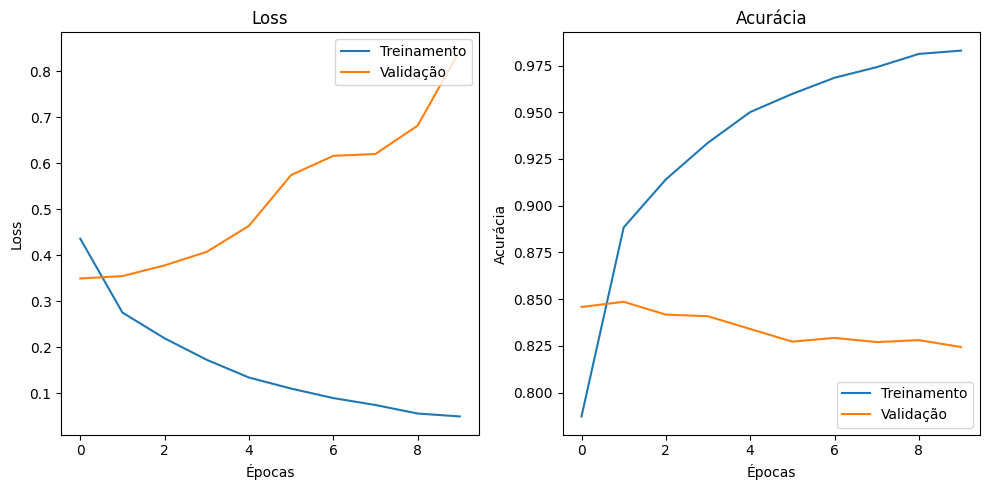

In [22]:
# Avaliando o modelo
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
loss, accuracy = model.evaluate(test_data, test_labels, verbose=0)
print(f'Acurácia: {accuracy*100:.2f}%')

# Plotando os gráficos de loss e acurácia
plt.figure(figsize=(10, 5))

# Gráfico de Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.legend(['Treinamento', 'Validação'], loc='upper right')

# Gráfico de Acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['Treinamento', 'Validação'], loc='lower right')

plt.tight_layout()
plt.show()

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


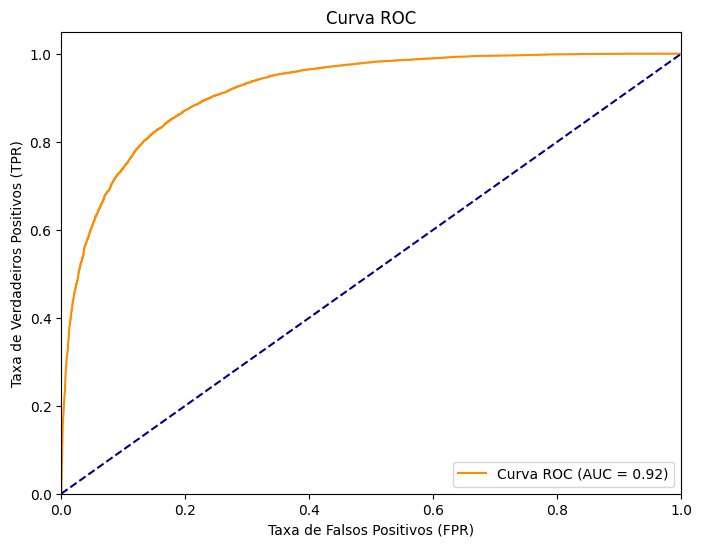

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = model.predict(test_data)

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(test_labels, y_pred_proba)

# Calculando a área sob a curva (AUC)
auc_value = auc(fpr, tpr)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'Curva ROC (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## Análise dos Gráficos

**1. Gráfico de Perda (Loss)**

* Linha de Treinamento: A perda no conjunto de treinamento diminui rapidamente e continua a diminuir ao longo das épocas.
* Linha de Validação: A perda no conjunto de validação começa mais baixa, mas aumenta gradualmente ao longo das épocas.

**2. Gráfico de Acurácia (Accuracy)**

* Linha de Treinamento: A acurácia no conjunto de treinamento aumenta rapidamente e se aproxima de 1.0 (100%) ao longo das épocas.
* Linha de Validação: A acurácia no conjunto de validação começa mais alta, mas não aumenta significativamente e permanece abaixo da linha de treinamento.


### **Interpretação**

* **Overfitting:**
   - Indicação: A perda de validação aumenta enquanto a perda de treinamento diminui, e a acurácia de validação não melhora significativamente.
   - Causa: O modelo está aprendendo muito bem os padrões específicos do conjunto de treinamento, mas não está generalizando bem para novos dados. Isso é um sinal clássico de overfitting.

* **Generalização:**
  - Problema: O modelo não está generalizando bem para o conjunto de validação, o que significa que ele pode não performar bem em dados não vistos.
  - Solução: Implementar técnicas para melhorar a generalização.
    Possíveis Soluções para Melhorar a Generalização


* **Regularização:**

  -  Dropout: Adicionar camadas de dropout para desativar aleatoriamente uma fração dos neurônios durante o treinamento.
    
  -  L2 Regularization: Adicionar uma penalidade aos pesos dos neurônios para evitar que eles se tornem muito grandes.
    Aumentar os Dados de Treinamento:
    
  -  Data Augmentation: Aumentar artificialmente o conjunto de dados de treinamento criando variações dos dados existentes.
    
* **Early Stopping:**
  - Definição: Parar o treinamento quando a perda de validação começar a aumentar, evitando o overfitting.
  - Reduzir a Complexidade do Modelo:
  - Menos Neurônios/Camadas: Reduzir o número de neurônios ou camadas para evitar que o modelo se ajuste demais aos dados de treinamento.

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, Input

# Carregar e pré-processar os dados
max_features = 10000
maxlen = 100

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Definir o modelo
model = Sequential()
model.add(Input(shape=(maxlen,)))
model.add(Embedding(max_features, 32)) # aumentei para 32
model.add(Flatten())
model.add(Dropout(0.5))  # Adicionando Dropout com taxa de 50%
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))  # Adicionando Dropout com taxa de 50%
model.add(Dense(1, activation='sigmoid'))

# Compilar o modelo substituir pelo adam e depois pelo sgd
model.compile(optimizer='RMSProp', loss='binary_crossentropy', metrics=['accuracy'])


# Treinar o modelo
#usamos batch_size = 64 explicação mais adiante

history = model.fit(train_data, train_labels, epochs=10, batch_size=64, validation_split=0.2)


# Avaliar o modelo
loss, accuracy = model.evaluate(test_data, test_labels)
print(f'Acurácia no conjunto de teste: {accuracy*100:.2f}%')


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5541 - loss: 0.6731 - val_accuracy: 0.8130 - val_loss: 0.4231
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8271 - loss: 0.4010 - val_accuracy: 0.8436 - val_loss: 0.3531
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8815 - loss: 0.3032 - val_accuracy: 0.8400 - val_loss: 0.3695
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9061 - loss: 0.2503 - val_accuracy: 0.8504 - val_loss: 0.3521
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9216 - loss: 0.2126 - val_accuracy: 0.8486 - val_loss: 0.3722
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9342 - loss: 0.1816 - val_accuracy: 0.8504 - val_loss: 0.3913
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9455 - loss: 0.1523 - val_accuracy: 0.8454 - val_loss: 0.4325
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9535 - loss: 0.1374 - val_accuracy

Acurácia: 84.20%


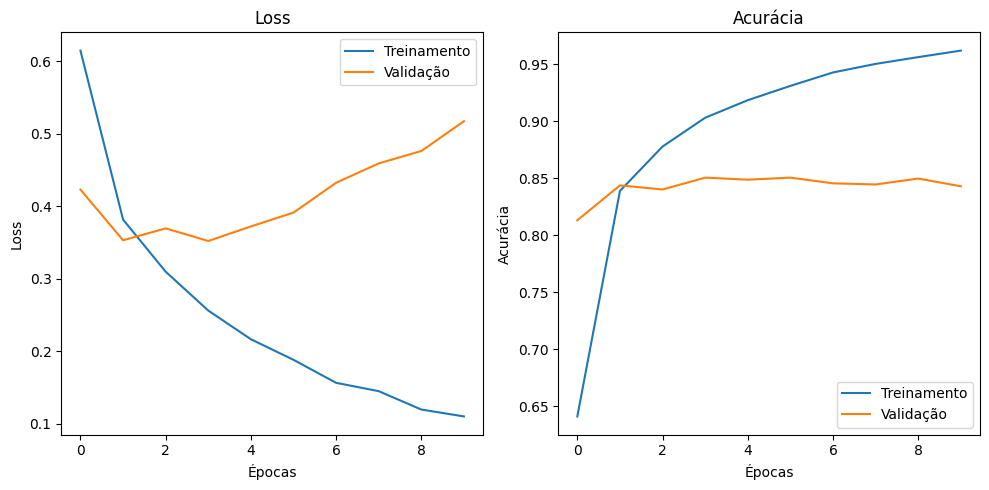

In [ ]:
# Avaliando o modelo
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
loss, accuracy = model.evaluate(test_data, test_labels, verbose=0)
print(f'Acurácia: {accuracy*100:.2f}%')

# Plotando os gráficos de loss e acurácia
plt.figure(figsize=(10, 5))

# Gráfico de Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.legend(['Treinamento', 'Validação'], loc='upper right')

# Gráfico de Acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['Treinamento', 'Validação'], loc='lower right')

plt.tight_layout()
plt.show()

## `batch_size`
O parâmetro `batch_size` define o número de amostras que serão processadas em cada etapa de treinamento (batch).

**Como funciona:**

- Em vez de processar todas as amostras de treinamento de uma vez, o modelo é treinado em batches.
- Cada batch é usado para calcular o gradiente e atualizar os pesos do modelo.
- O modelo é então treinado em uma série de batches, até que todas as amostras de treinamento tenham sido processadas.

**Importância do `batch_size`:**

- **Memória:**  `batch_size` controla a quantidade de dados que o modelo processa em cada etapa. Um `batch_size` menor requer menos memória, mas pode levar mais tempo para treinar. Um `batch_size` maior requer mais memória, mas pode treinar mais rapidamente.
- **Generalização:** `batch_size` afeta a generalização do modelo. Batches menores podem ajudar a evitar overfitting, pois o modelo está aprendendo com subconjuntos de dados menores e mais variados. Batches maiores podem levar a overfitting se o modelo aprender padrões específicos de um batch grande.
- **Convergência:** `batch_size` também influencia a velocidade de convergência do treinamento. Batches menores podem resultar em atualizações de peso mais frequentes e, portanto, convergência mais rápida. Batches maiores podem resultar em atualizações de peso menos frequentes, mas podem levar a convergência mais suave.
- **Otimização:**  `batch_size` é um hiperparâmetro que precisa ser ajustado. É importante experimentar diferentes valores para encontrar o melhor compromisso entre desempenho, tempo de treinamento e recursos de memória.

**Exemplo:**

- Se `batch_size=32`, o modelo processará 32 amostras de treinamento em cada etapa.

## Lista de otimizadores

* **SGD (Stochastic Gradient Descent):** Um dos otimizadores mais básicos, que atualiza os pesos do modelo com base em cada exemplo de treinamento.
* **Adam (Adaptive Moment Estimation):** Combina as vantagens de dois outros otimizadores, AdaGrad e RMSProp, e é amplamente utilizado devido à sua eficiência e bom desempenho em muitos problemas1.
* **RMSProp (Root Mean Square Propagation):** Ajusta a taxa de aprendizado para cada parâmetro, o que pode ser útil para problemas com dados esparsos1.
* **Adagrad (Adaptive Gradient Algorithm):** Ajusta a taxa de aprendizado com base na frequência dos parâmetros, sendo útil para dados esparsos1.
* **Adadelta:** Uma extensão do Adagrad que busca reduzir sua taxa de aprendizado decrescente1.
* **Nadam (Nesterov-accelerated Adaptive Moment Estimation):** Uma variante do Adam que incorpora o método de Nesterov

**1. `verbose`:**

- **Objetivo:** Define o nível de detalhes que você deseja ver durante o processo de treinamento.
- **Valores:**
    - `0`: Silencioso. Nenhuma informação é exibida durante o treinamento.
    - `1`: Barra de progresso. Uma barra de progresso é exibida, mostrando o progresso do treinamento em cada época.
    - `2`: Uma linha por época. Uma linha de texto com as métricas de treinamento (loss, acurácia, etc.) é exibida para cada época.
- **Uso:** Escolha `0` para um treinamento silencioso, `1` para uma visualização simples e `2` para ver informações mais detalhadas a cada época.

**2. `callbacks`:**

- **Objetivo:** Permitir a aplicação de "callbacks" durante o treinamento. Callbacks são funções que podem ser chamadas em pontos específicos do treinamento, como o início e o fim de uma época, ou durante a validação.
- **Tipos de Callbacks:**
    - `EarlyStopping`: Para interromper o treinamento precocemente se a performance do modelo não melhorar por um determinado número de épocas.
    - `ModelCheckpoint`: Para salvar o modelo em pontos específicos do treinamento, como após cada época ou quando a performance melhorar.
    - `ReduceLROnPlateau`: Para reduzir a taxa de aprendizado do otimizador se a performance do modelo não melhorar.
    - `TensorBoard`: Para registrar métricas e gráficos do treinamento para visualização no TensorBoard.
    - E muitos outros...
- **Uso:** Crie instâncias dos callbacks que você deseja usar e passe uma lista deles como o parâmetro `callbacks`.

**3. `validation_data`:**

- **Objetivo:** Especificar um conjunto de dados de validação que será usado para avaliar a performance do modelo durante o treinamento.
- **Formato:** Deve ser uma tupla de `(X_val, y_val)`, onde `X_val` é o conjunto de features de validação e `y_val` é o conjunto de targets de validação.
- **Uso:** Se você quiser usar um conjunto de dados separado para validação em vez de usar `validation_split`, use esse parâmetro.

**4. `validation_split`:**

- **Objetivo:** Definir a proporção dos dados de treinamento que serão usados para validação.
- **Formato:** Um valor decimal entre 0 e 1. Por exemplo, `validation_split=0.2` significa que 20% dos dados de treinamento serão usados para validação.
- **Uso:** Se você quiser usar parte dos dados de treinamento para validação, use esse parâmetro.

**5. `steps_per_epoch`:**

- **Objetivo:** Controlar o número de batches de treinamento que serão executados antes de uma época ser considerada finalizada.
- **Uso:** É útil quando você está usando um gerador de dados, onde você pode não querer processar todos os dados de treinamento em cada época.

**6. `validation_steps`:**

- **Objetivo:** Controlar o número de batches de validação que serão executados em cada época.
- **Uso:** É útil quando você está usando um gerador de dados para validação, onde você pode não querer processar todos os dados de validação a cada época.

**7. `class_weight`:**

- **Objetivo:** Definir pesos para diferentes classes no caso de classes desbalanceadas, dando mais importância às classes minoritárias.
- **Formato:** Um dicionário que mapeia os rótulos das classes para os pesos correspondentes.
- **Uso:** Use esse parâmetro para melhorar a performance do modelo em conjuntos de dados com classes desbalanceadas.

**8. `sample_weight`:**

- **Objetivo:** Definir pesos para cada amostra de treinamento.
- **Formato:** Um array com o mesmo tamanho do conjunto de dados de treinamento, onde cada elemento representa o peso da amostra correspondente.
- **Uso:**  Similar a `class_weight`, mas permite atribuir pesos individuais a cada amostra.

**9. `initial_epoch`:**

- **Objetivo:** Especificar a época na qual começar o treinamento.
- **Uso:** Útil para retomar o treinamento de um modelo previamente treinado.

**10. `max_queue_size`:**

- **Objetivo:**  Definir o tamanho máximo da fila para o gerador de dados.
- **Uso:**  Relevante quando você está usando um gerador de dados para carregar dados em batches.

**11. `workers`:**

- **Objetivo:** Definir o número de processos a serem usados para geração de dados em paralelo.
- **Uso:**  Acelera o treinamento se você estiver usando um gerador de dados.

**12. `use_multiprocessing`:**

- **Objetivo:** Habilitar ou desabilitar o uso de processamento múltiplo para geração de dados.
- **Uso:**  Se você tiver múltiplos núcleos de processamento, habilitar o processamento múltiplo pode acelerar o treinamento.

**Importante:**

- Nem todos os parâmetros são usados em todos os cenários de treinamento.
- Experimente com diferentes configurações desses parâmetros para otimizar o desempenho do seu modelo.




## Exemplo de treinamento com vários parametros
```python
from tensorflow.keras.callbacks import EarlyStopping

history = model.fit(
    train_data,
    train_labels,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    shuffle=True,
    verbose=1,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
)
```

# Aplicar early stopping